# Compare Vocabulary

## Imports

In [1]:
import pandas as pd
import spacy

## Necessary Download

In [2]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 18.3 MB/s eta 0:00:0031m19.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


## Load Data

In [10]:
# load merged data
data = pd.read_csv('../data/final_data/final_data.csv')

## Load Spacy Model

In [4]:
nlp = spacy.load('pt_core_news_sm')

In [11]:
import numpy as np
import pandas as pd
import spacy
from collections import Counter
from scipy.stats import entropy

# Carregar o modelo de linguagem do spaCy

# Função para calcular RTTR
def calculate_rttr(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    t = len(set(tokens))  # Número de palavras distintas
    n = len(tokens)       # Número total de palavras
    return t / np.sqrt(n) if n > 0 else 0

# Função para calcular Mass
def calculate_mass(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    t = len(set(tokens))  # Número de palavras distintas
    n = len(tokens)       # Número total de palavras
    return (np.log(n) - np.log(t)) / (np.log(n) ** 2) if n > 0 else 0

# Função para calcular Entropia Lexical
def calculate_entropy(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    word_freq = Counter(tokens)
    word_probs = np.array(list(word_freq.values())) / sum(word_freq.values())
    return entropy(word_probs)

# Aplicar as métricas ao DataFrame
def apply_metrics(row):
    return pd.Series({
        'RTTR_real': calculate_rttr(row['content']),
        'RTTR_ia': calculate_rttr(row['gpt_content']),
        'Mass_real': calculate_mass(row['content']),
        'Mass_ia': calculate_mass(row['gpt_content']),
        'Entropy_real': calculate_entropy(row['content']),
        'Entropy_ia': calculate_entropy(row['gpt_content']),
    })

# Aplicar ao DataFrame 'data'
metrics_df = data.apply(apply_metrics, axis=1)

# Mesclar com o DataFrame original
result_df = pd.concat([data, metrics_df], axis=1)


/tmp/ipykernel_25275/3759955102.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return (np.log(n) - np.log(t)) / (np.log(n) ** 2) if n > 0 else 0


In [16]:
result_df

,request_idx,id,custom_id,response,error,idx,gpt_content,title,url,content,subject,sub-subject,RTTR_real,RTTR_ia,Mass_real,Mass_ia,Entropy_real,Entropy_ia
0,request_0,batch_req_Fh89CoOf77NdMVGOFXQurqiF,request-0,"{'status_code': 200, 'request_id': '39ed97d30b...",NaN,0,# Análise Combinatória\n\n## O que é Análise C...,Análise combinatória,https://brasilescola.uol.com.br/matematica/ana...,A análise combinatória é um campo de estudo da...,matematica,analise-combinatoria.htm,9.915910,7.583072,0.025847,0.026084,5.210395,4.527494
1,request_1,batch_req_uNtucyIRFRQ6OIbWKiqZOL5s,request-1,"{'status_code': 200, 'request_id': 'fa46145c92...",NaN,1,# Binômio de Newton\n\n## O que é o Binômio de...,Binômio de Newton,https://brasilescola.uol.com.br/matematica/bin...,Binômio de Newton é qualquer binômio elevado a...,matematica,binomio-de-newton.htm,9.409484,7.778175,0.025412,0.024327,4.966979,4.406636
2,request_2,batch_req_5Yc3hvyMXHmKUAWGJShXFQOq,request-2,"{'status_code': 200, 'request_id': 'c240517a40...",NaN,2,# Resumo Didático: Circunferência\n\n## O que ...,Circunferência,https://brasilescola.uol.com.br/matematica/cir...,A circunferência é uma figura geométrica plana...,matematica,circunferencia.htm,8.246437,6.895848,0.028324,0.028535,4.823958,4.274112
3,request_3,batch_req_Brvs4y174GwTOK0cvWpY5kKv,request-3,"{'status_code': 200, 'request_id': '63b6574714...",NaN,3,# Resumo Didático: Conjuntos em Matemática\n\n...,Conjuntos,https://brasilescola.uol.com.br/matematica/con...,A compreensão de conjuntos é a principal base ...,matematica,conjunto.htm,9.212773,6.837076,0.026646,0.030383,4.930163,4.325103
4,request_4,batch_req_9rSjoBC8WgHFZ2pXQHW0tH59,request-4,"{'status_code': 200, 'request_id': 'ae8cac8d48...",NaN,4,# Resumo Didático: Equação em Matemática\n\n##...,Equação,https://brasilescola.uol.com.br/matematica/equ...,Uma equação é uma sentença matemática que poss...,matematica,equacao.htm,8.888961,7.801895,0.027381,0.024978,5.006659,4.494067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,request_4957,batch_req_w7AYhUnLK0c24aylNId4NY7P,request-4957,"{'status_code': 200, 'request_id': '651e5fae0f...",NaN,4957,# Eclipse Solar: Um Resumo Didático\n\n## O qu...,Eclipse Solar,https://querobolsa.com.br/enem/geografia/eclip...,1) Introdução\n\n2) Tipos de eclipse solar\n\n...,geografia,eclipse-solar,9.627467,9.249673,0.022871,0.022811,4.864287,4.755423
4271,request_4958,batch_req_aAgMZobD44LBqLUp7laTfZJh,request-4958,"{'status_code': 200, 'request_id': 'e8da5223a3...",NaN,4958,"# Resumo Didático: Ecologia Social, Econômica ...","Ecologia Social, Econômica e Ambiental",https://querobolsa.com.br/enem/geografia/ecolo...,1) Introdução\n\n2) Conceitos\n\n3) Níveis de ...,geografia,ecologia-social-economica-e-ambiental,11.819470,11.144093,0.019044,0.019109,5.119599,5.077249
4272,request_4959,batch_req_4UhYghccRBirflYIlkc0yYf6,request-4959,"{'status_code': 200, 'request_id': '54cf0cecee...",NaN,4959,# Resumo Didático: Economia Global Atual\n\n##...,Economia global atual,https://querobolsa.com.br/enem/geografia/econo...,1) Introdução\n\n2) Revolução Verde\n\n3) Bret...,geografia,economia-global-atual,13.034483,10.494467,0.017632,0.019880,5.326758,4.937767
4273,request_4961,batch_req_M3T06noqvdvhKZzh5g7Myf66,request-4961,"{'status_code': 200, 'request_id': '36e0c5e700...",NaN,4961,# Elementos de um Mapa: Principais Componentes...,Elementos de um Mapa: veja quais são os princi...,https://querobolsa.com.br/enem/geografia/eleme...,1) Introdução\n\n2) Título\n\n3) Coordenadas g...,geografia,elementos-do-mapa,11.418014,9.296815,0.019266,0.022941,5.141896,4.827023


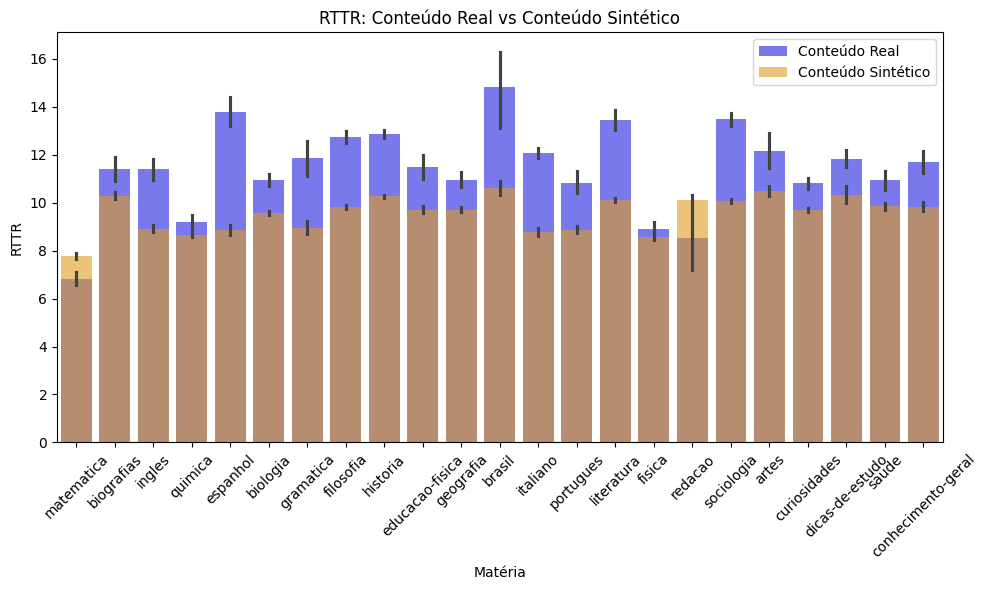

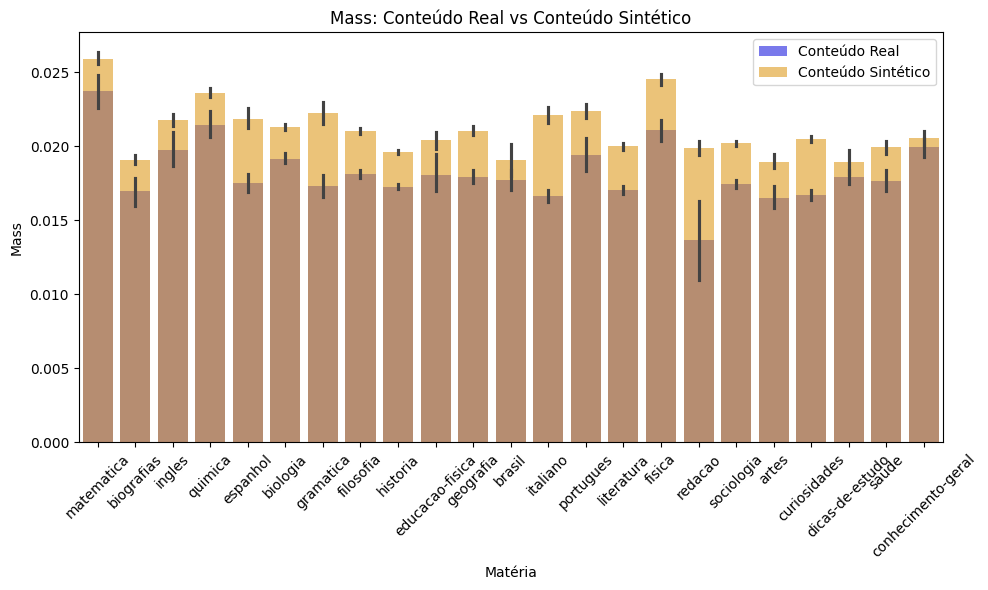

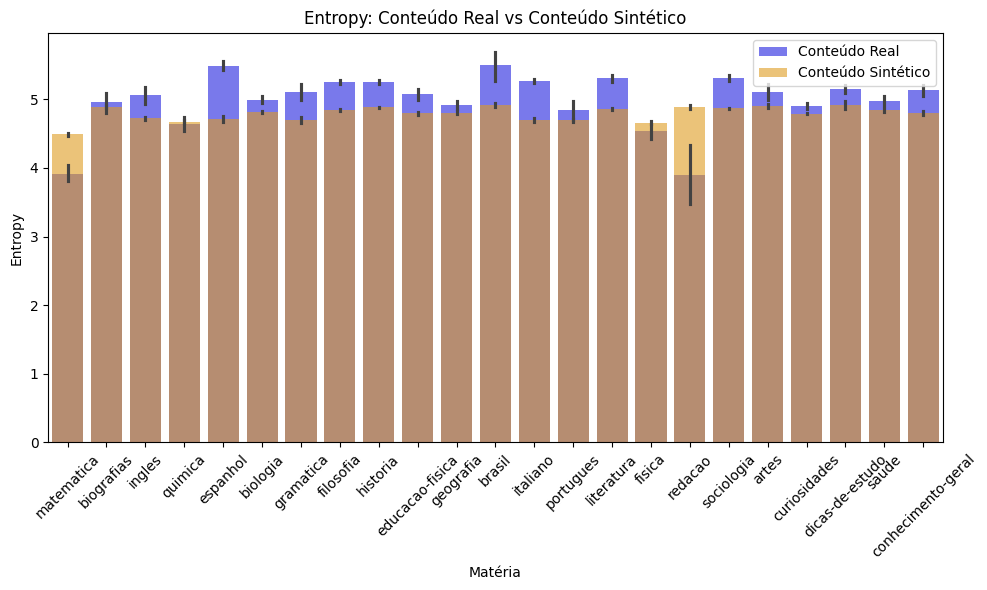

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="subject", y="RTTR_real", data=result_df, color="blue", alpha=0.6, label="Conteúdo Real")
sns.barplot(x="subject", y="RTTR_ia", data=result_df, color="orange", alpha=0.6, label="Conteúdo Sintético")
plt.title("RTTR: Conteúdo Real vs Conteúdo Sintético")
plt.xlabel("Matéria")
plt.ylabel("RTTR")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="subject", y="Mass_real", data=result_df, color="blue", alpha=0.6, label="Conteúdo Real")
sns.barplot(x="subject", y="Mass_ia", data=result_df, color="orange", alpha=0.6, label="Conteúdo Sintético")
plt.title("Mass: Conteúdo Real vs Conteúdo Sintético")
plt.xlabel("Matéria")
plt.ylabel("Mass")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x="subject", y="Entropy_real", data=result_df, color="blue", alpha=0.6, label="Conteúdo Real")
sns.barplot(x="subject", y="Entropy_ia", data=result_df, color="orange", alpha=0.6, label="Conteúdo Sintético")
plt.title("Entropy: Conteúdo Real vs Conteúdo Sintético")
plt.xlabel("Matéria")
plt.ylabel("Entropy")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
'HENRIQUE MOREIRA DE ALBUQUERQUE'.lower()
# to lower


'henrique moreira de albuquerque'

In [27]:
# i need a dataframe grouped by subject, and it should have all metrics, metrics should be mean and also concatened_content
new_df = result_df.groupby('subject').agg({
    'RTTR_real': 'mean',
    'RTTR_ia': 'mean',
    'Mass_real': 'mean',
    'Mass_ia': 'mean',
    'Entropy_real': 'mean',
    'Entropy_ia': 'mean',
    'content': ' '.join,
    'gpt_content': ' '.join
}).reset_index()

In [28]:
new_df# get total of words and distintct words for each subject
new_df['total_words_real'] = new_df['content'].apply(lambda x: len(x.split()))
new_df['total_words_ia'] = new_df['gpt_content'].apply(lambda x: len(x.split()))
new_df['distinct_words_real'] = new_df['content'].apply(lambda x: len(set(x.split())))
new_df['distinct_words_ia'] = new_df['gpt_content'].apply(lambda x: len(set(x.split())))

In [37]:
test_df = new_df[['subject', 'total_words_real', 'total_words_ia', 'distinct_words_real', 'distinct_words_ia', 'RTTR_real', 'RTTR_ia', 'Mass_real', 'Mass_ia', 'Entropy_real', 'Entropy_ia']].rename(columns={
    'total_words_real': 'Número total de palavras Real',
    'total_words_ia': 'Número total de palavras IA',
    'distinct_words_real': 'Número de palavras distintas Real',
    'distinct_words_ia': 'Número de palavras distintas IA',
    'RTTR_real': 'RTTR Real',
    'RTTR_ia': 'RTTR IA',
    'Mass_real': 'Mass Real',
    'Mass_ia': 'Mass IA',
    'Entropy_real': 'Entropy Real',
    'Entropy_ia': 'Entropy IA'
})
# convert metrics to 2 decimal places
test_df = test_df.round(4)
test_df.to_csv('../teste.csv', index=False)


In [30]:
# convert that to a table that should apper in the paper
new_df.to_markdown()

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [20]:
result_df

,request_idx,id,custom_id,response,error,idx,gpt_content,title,url,content,subject,sub-subject,RTTR_real,RTTR_ia,Mass_real,Mass_ia,Entropy_real,Entropy_ia,vocabulary_size_real
0,request_0,batch_req_Fh89CoOf77NdMVGOFXQurqiF,request-0,"{'status_code': 200, 'request_id': '39ed97d30b...",NaN,0,# Análise Combinatória\n\n## O que é Análise C...,Análise combinatória,https://brasilescola.uol.com.br/matematica/ana...,A análise combinatória é um campo de estudo da...,matematica,analise-combinatoria.htm,9.915910,7.583072,0.025847,0.026084,5.210395,4.527494,21353
1,request_1,batch_req_uNtucyIRFRQ6OIbWKiqZOL5s,request-1,"{'status_code': 200, 'request_id': 'fa46145c92...",NaN,1,# Binômio de Newton\n\n## O que é o Binômio de...,Binômio de Newton,https://brasilescola.uol.com.br/matematica/bin...,Binômio de Newton é qualquer binômio elevado a...,matematica,binomio-de-newton.htm,9.409484,7.778175,0.025412,0.024327,4.966979,4.406636,21353
2,request_2,batch_req_5Yc3hvyMXHmKUAWGJShXFQOq,request-2,"{'status_code': 200, 'request_id': 'c240517a40...",NaN,2,# Resumo Didático: Circunferência\n\n## O que ...,Circunferência,https://brasilescola.uol.com.br/matematica/cir...,A circunferência é uma figura geométrica plana...,matematica,circunferencia.htm,8.246437,6.895848,0.028324,0.028535,4.823958,4.274112,21353
3,request_3,batch_req_Brvs4y174GwTOK0cvWpY5kKv,request-3,"{'status_code': 200, 'request_id': '63b6574714...",NaN,3,# Resumo Didático: Conjuntos em Matemática\n\n...,Conjuntos,https://brasilescola.uol.com.br/matematica/con...,A compreensão de conjuntos é a principal base ...,matematica,conjunto.htm,9.212773,6.837076,0.026646,0.030383,4.930163,4.325103,21353
4,request_4,batch_req_9rSjoBC8WgHFZ2pXQHW0tH59,request-4,"{'status_code': 200, 'request_id': 'ae8cac8d48...",NaN,4,# Resumo Didático: Equação em Matemática\n\n##...,Equação,https://brasilescola.uol.com.br/matematica/equ...,Uma equação é uma sentença matemática que poss...,matematica,equacao.htm,8.888961,7.801895,0.027381,0.024978,5.006659,4.494067,21353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,request_4957,batch_req_w7AYhUnLK0c24aylNId4NY7P,request-4957,"{'status_code': 200, 'request_id': '651e5fae0f...",NaN,4957,# Eclipse Solar: Um Resumo Didático\n\n## O qu...,Eclipse Solar,https://querobolsa.com.br/enem/geografia/eclip...,1) Introdução\n\n2) Tipos de eclipse solar\n\n...,geografia,eclipse-solar,9.627467,9.249673,0.022871,0.022811,4.864287,4.755423,25832
4271,request_4958,batch_req_aAgMZobD44LBqLUp7laTfZJh,request-4958,"{'status_code': 200, 'request_id': 'e8da5223a3...",NaN,4958,"# Resumo Didático: Ecologia Social, Econômica ...","Ecologia Social, Econômica e Ambiental",https://querobolsa.com.br/enem/geografia/ecolo...,1) Introdução\n\n2) Conceitos\n\n3) Níveis de ...,geografia,ecologia-social-economica-e-ambiental,11.819470,11.144093,0.019044,0.019109,5.119599,5.077249,25832
4272,request_4959,batch_req_4UhYghccRBirflYIlkc0yYf6,request-4959,"{'status_code': 200, 'request_id': '54cf0cecee...",NaN,4959,# Resumo Didático: Economia Global Atual\n\n##...,Economia global atual,https://querobolsa.com.br/enem/geografia/econo...,1) Introdução\n\n2) Revolução Verde\n\n3) Bret...,geografia,economia-global-atual,13.034483,10.494467,0.017632,0.019880,5.326758,4.937767,25832
4273,request_4961,batch_req_M3T06noqvdvhKZzh5g7Myf66,request-4961,"{'status_code': 200, 'request_id': '36e0c5e700...",NaN,4961,# Elementos de um Mapa: Principais Componentes...,Elementos de um Mapa: veja quais são os princi...,https://querobolsa.com.br/enem/geografia/eleme...,1) Introdução\n\n2) Título\n\n3) Coordenadas g...,geografia,elementos-do-mapa,11.418014,9.296815,0.019266,0.022941,5.141896,4.827023,25832


In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x="subject", y="vocabulary_size_real", data=result_df, color="blue", label="Real Content")
sns.barplot(x="subject", y="vocabulary_size_ia", data=result_df, color="orange", label="AI-Generated Content")
plt.title("Vocabulary Size: Real Content vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Vocabulary Size")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `vocabulary_size_real` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

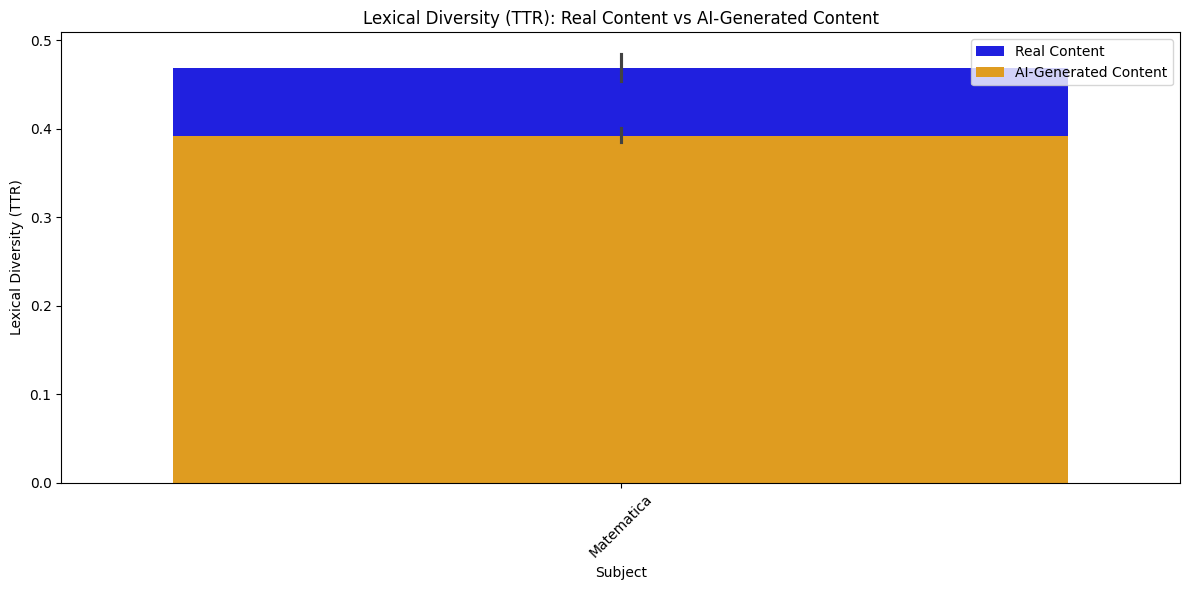

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="subject", y="lexical_diversity_real", data=result_df, color="blue", label="Real Content")
sns.barplot(x="subject", y="lexical_diversity_ia", data=result_df, color="orange", label="AI-Generated Content")
plt.title("Lexical Diversity (TTR): Real Content vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Lexical Diversity (TTR)")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


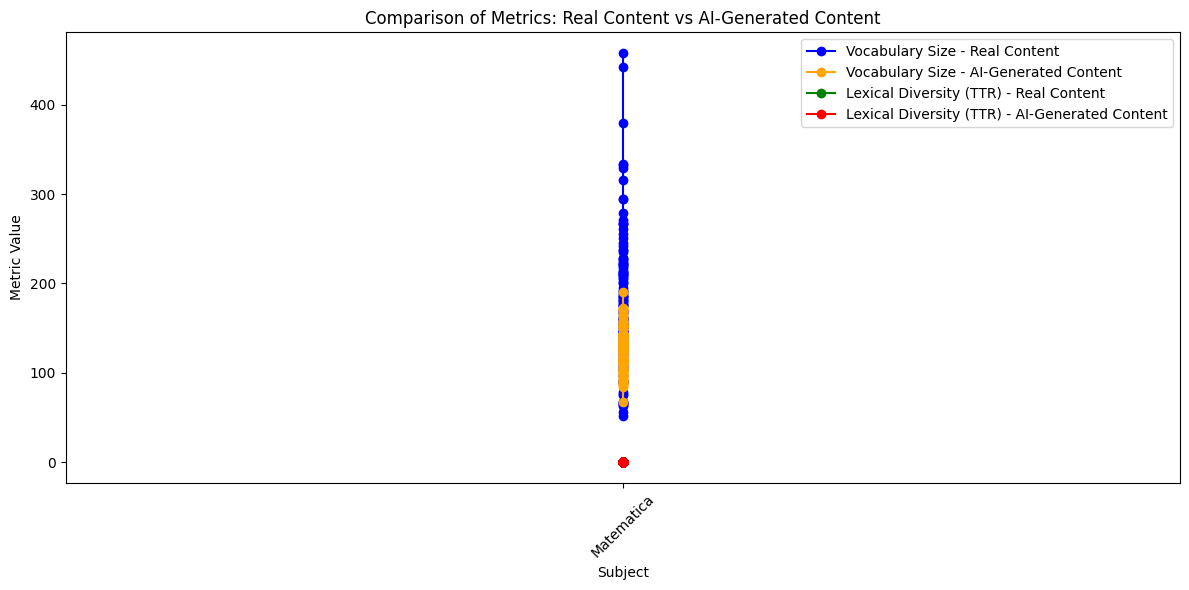

In [ ]:
plt.figure(figsize=(12, 6))

# Vocabulary Size
plt.plot(result_df['subject'], result_df['vocabulary_size_real'], marker='o', label='Vocabulary Size - Real Content', color='blue')
plt.plot(result_df['subject'], result_df['vocabulary_size_ia'], marker='o', label='Vocabulary Size - AI-Generated Content', color='orange')

# Lexical Diversity
plt.plot(result_df['subject'], result_df['lexical_diversity_real'], marker='o', label='Lexical Diversity (TTR) - Real Content', color='green')
plt.plot(result_df['subject'], result_df['lexical_diversity_ia'], marker='o', label='Lexical Diversity (TTR) - AI-Generated Content', color='red')

plt.title("Comparison of Metrics: Real Content vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


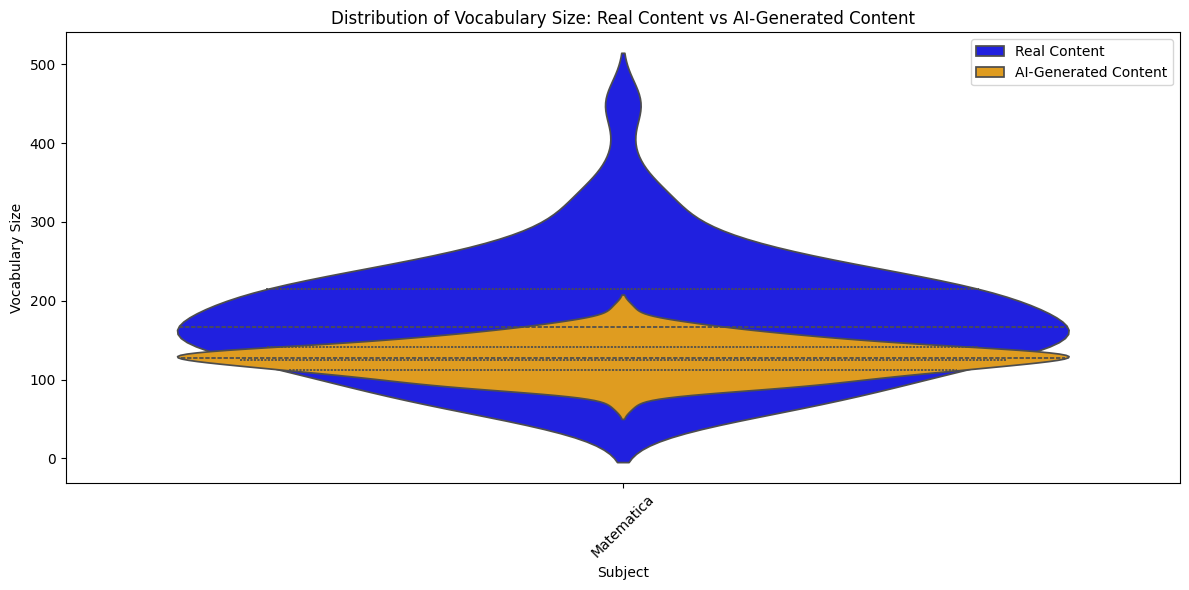

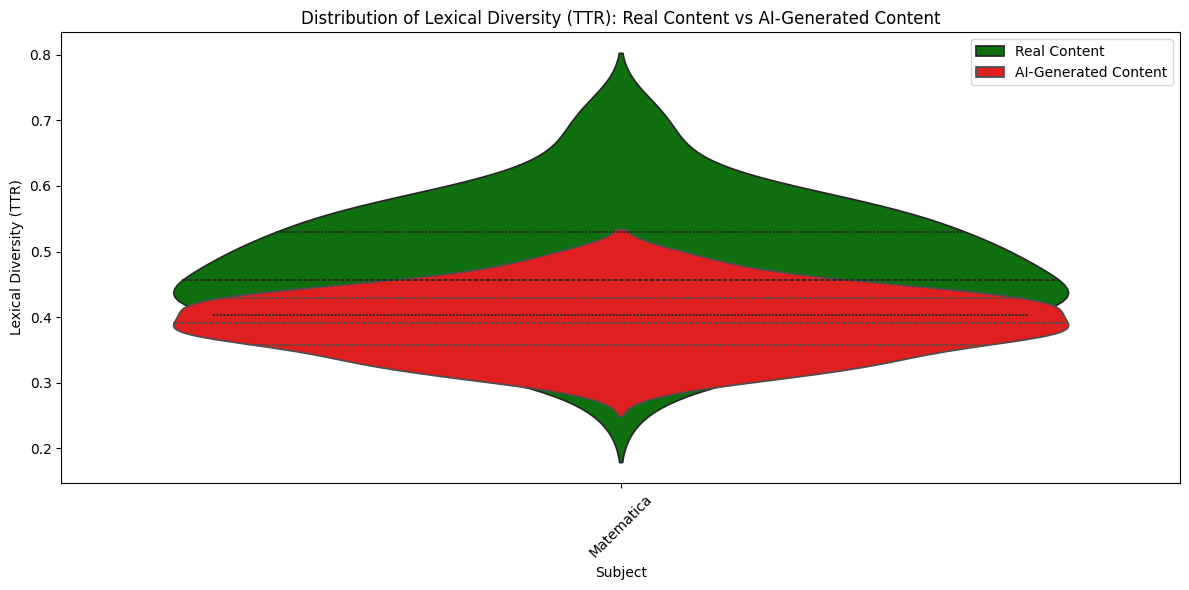

In [ ]:
plt.figure(figsize=(12, 6))

# Violin plot for Vocabulary Size
sns.violinplot(x="subject", y="vocabulary_size_real", data=result_df, inner="quartile", color="blue", label="Real Content")
sns.violinplot(x="subject", y="vocabulary_size_ia", data=result_df, inner="quartile", color="orange", label="AI-Generated Content")
plt.title("Distribution of Vocabulary Size: Real Content vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Vocabulary Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# Violin plot for Lexical Diversity
sns.violinplot(x="subject", y="lexical_diversity_real", data=result_df, inner="quartile", color="green", label="Real Content")
sns.violinplot(x="subject", y="lexical_diversity_ia", data=result_df, inner="quartile", color="red", label="AI-Generated Content")
plt.title("Distribution of Lexical Diversity (TTR): Real Content vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Lexical Diversity (TTR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/home/letrus/Documentos/Personal_Projects/soft_eng2/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/letrus/Documentos/Personal_Projects/soft_eng2/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/letrus/Documentos/Personal_Projects/soft_eng2/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/letrus/Doc

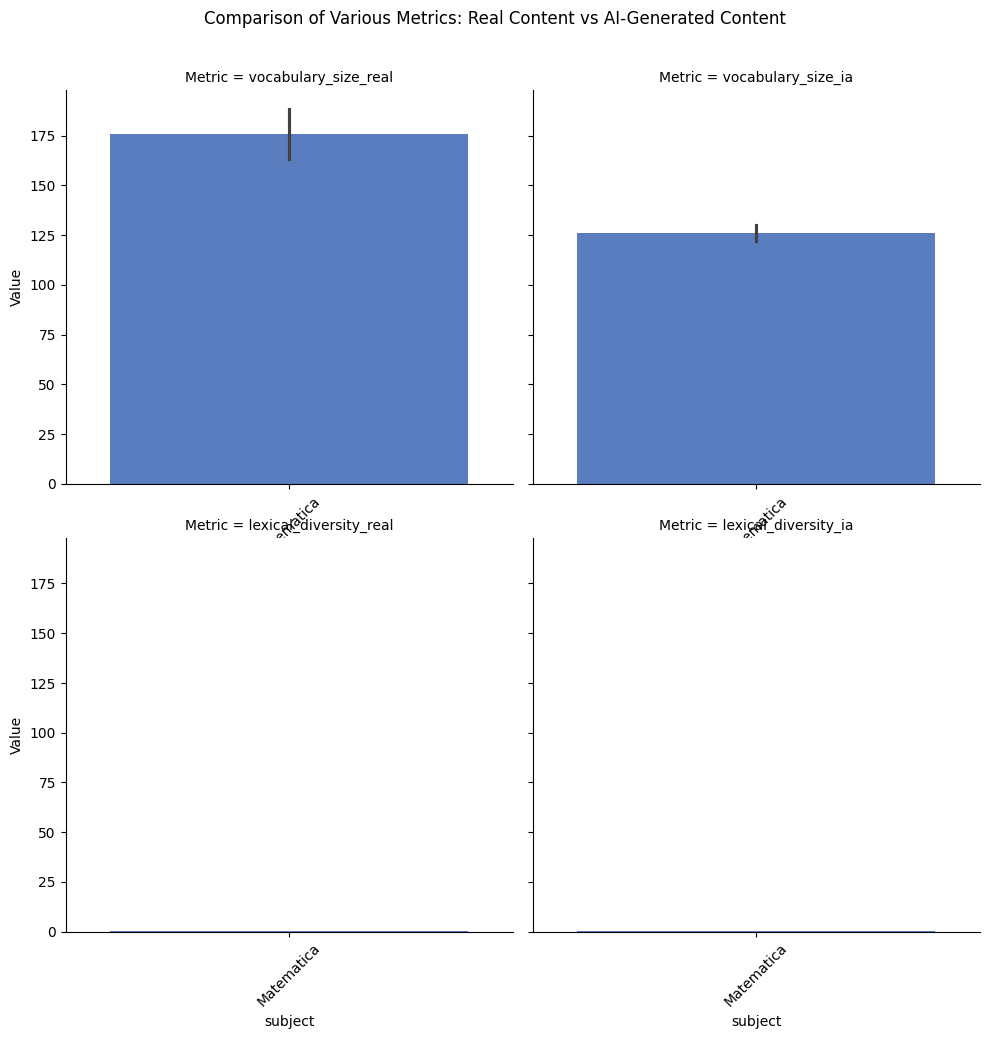

In [ ]:
metrics_melted = result_df.melt(id_vars="subject", value_vars=["vocabulary_size_real", "vocabulary_size_ia", "lexical_diversity_real", "lexical_diversity_ia"],
                                var_name="Metric", value_name="Value")

g = sns.FacetGrid(metrics_melted, col="Metric", col_wrap=2, height=5, sharex=False)
g.map(sns.barplot, "subject", "Value", order=result_df['subject'].unique(), palette="muted")
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Comparison of Various Metrics: Real Content vs AI-Generated Content")
plt.show()


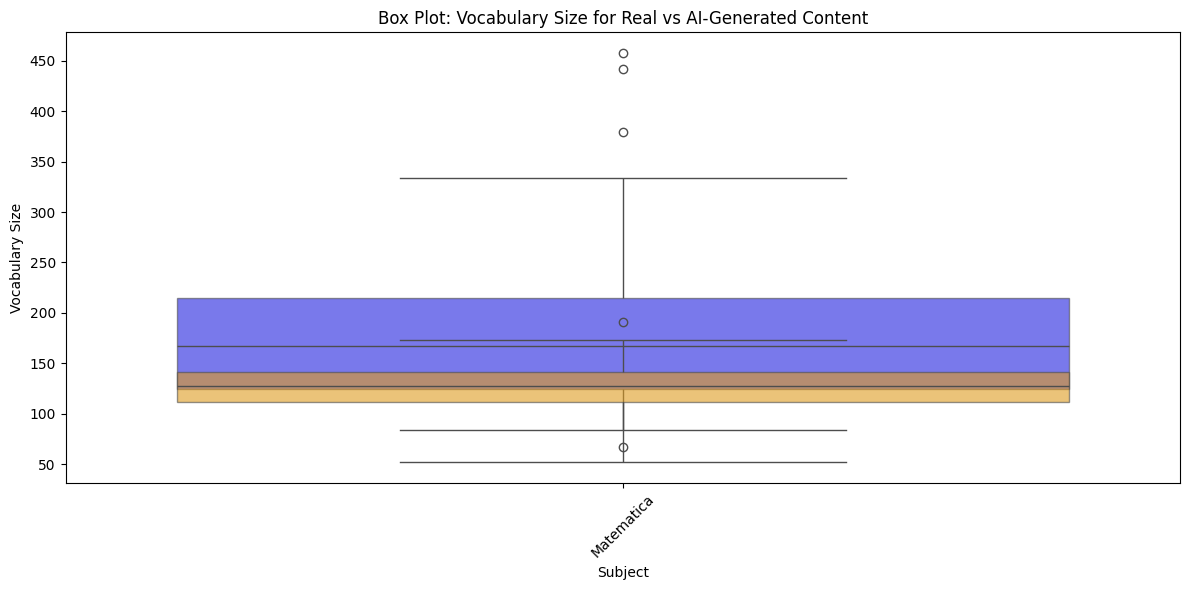

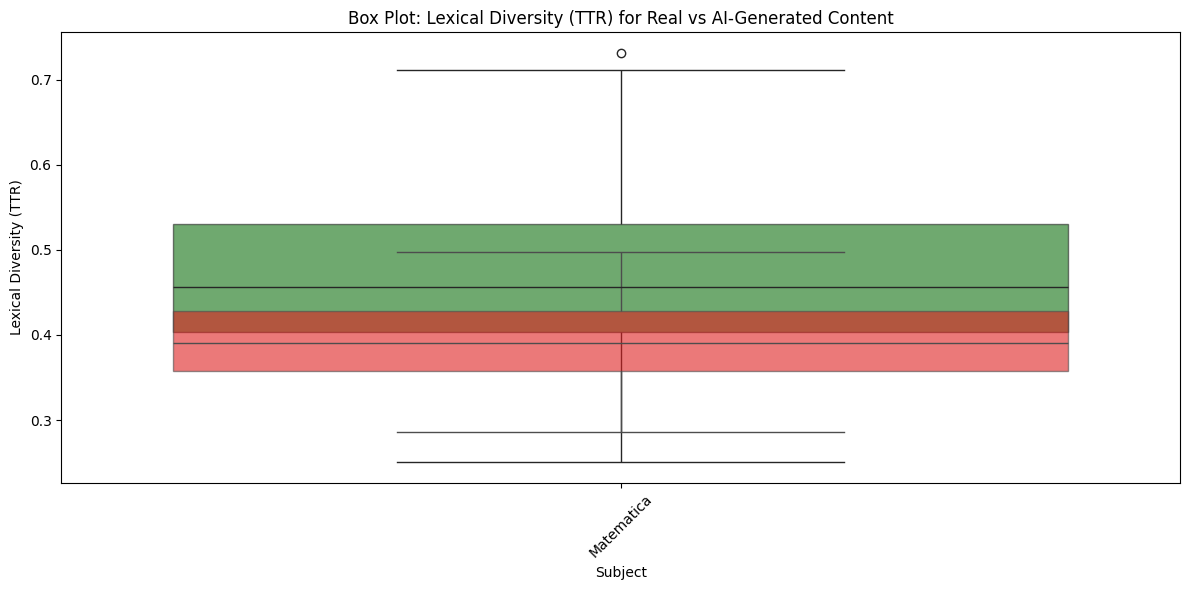

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="subject", y="vocabulary_size_real", data=result_df, color="blue", boxprops=dict(alpha=0.6))
sns.boxplot(x="subject", y="vocabulary_size_ia", data=result_df, color="orange", boxprops=dict(alpha=0.6))
plt.title("Box Plot: Vocabulary Size for Real vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Vocabulary Size")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="subject", y="lexical_diversity_real", data=result_df, color="green", boxprops=dict(alpha=0.6))
sns.boxplot(x="subject", y="lexical_diversity_ia", data=result_df, color="red", boxprops=dict(alpha=0.6))
plt.title("Box Plot: Lexical Diversity (TTR) for Real vs AI-Generated Content")
plt.xlabel("Subject")
plt.ylabel("Lexical Diversity (TTR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
